In [ ]:
"""
Vanilla Neurall Networks 가 가장 기본적인 신경망(one to one구조 입력 - 히든 - 출력)
일반적인 신경망
relu
마지막에 sigmoid, softmax


RNN(가장기본적인베이스, 구조/특징 이해필요, 성능은별로라잘안씀)
RNN에서 많이 사용되는 활성함수 - Tanh
자연어처리에서 많이사용
시간개념이 가미된 학습법
RNN은 히든계층에서 바로 출력 계층으로 가는것이 아니라 히든계층의 다음 셀로 넘어가고 그 셀들을
모두 넘어가 뒤에 출력계층으로 넘어간다.
딥러닝은 주로 예측모델을 만들 때 사용이 되어진다
순환 신경망은 이전 셀에서 출력되어진 값이 다음 셀에서도 출력이 되어지는 구조
one to many구조: 입력하나(사진하나) - 여러개 출력되어진다(설명글이 여러개)
                 Image Captioning에서 많이사용,
many to one구조: 입력이 여러개(영화참재밌었다 등등) - 출력이 하나(긍정)
                 Sentiment Classification
                 sequence of words->sentiment
                 (ex.감성분류)긍정/부정, 합/불 등 이진분류에서 많이사용 sigmoid
many to many구조: 여러개입력 - 여러개출력  (ex.번역기)
Machine Translation(기계번역)
seq of words -> seq of words
모든입력을 전달받은 다양한 셀들이 출력 여러개
Video classification on frame level(비디오분류)

input layer: 입력데이터의 값은 우리가 정하는게 아니다,데이터로부터 주어지는것 Vocabulary ex) [h,e,l.o]
hidden layer: 히든레이어의 차원은 우리가 정해준다
output layer
RNN의 단점: 긴 sequence에서는 충분한 기억을 가지고 있지 못하기 때문에 (데이터가손실된다) 엉뚱한 답을 출력할 수있다

LSTM구조
LSTM의 핵심 cell state는 모든 셀들에 연결되어져 있는 선 컨베이어 벨트와 유사
LSTM이 가지고 있는 대표적인 gate들은 필요한 정보를 저장하고 필요하지 않는 정보는 제거하는 등
상황에 맞춰 선택적으로 정보를 전달한다

입력 게이트(input gate layer) - 어떤 새로운 정보를 셀 스테이트로 저장을 할 것인가를 결정 할 수 있는 게이트
현재 셀에 입력되는 새로운 정보를 어느정도 지정을 할 것인가를 지정하는 게이트
LSTM은 RNN의 발전된 형태
LSTM은 시계열 데이터에서 상당히 효과적인 데이터를 도출해낸다
자연어 처리에서 많이 사용
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pip install finance-datareader

In [2]:
import FinanceDataReader as fdr

In [3]:
kakao=fdr.DataReader('035720') #kakao

In [4]:
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-10-31,38250,38950,37450,37800,1791726,-0.005263
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266


In [9]:
apple=fdr.DataReader('AAPL', '1981-01-01', '1982-10-31')#기간을 줄수도 있다
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1982-10-25,0.115513,0.116071,0.108259,0.108817,0.084316,184934400
1982-10-26,0.108817,0.109933,0.103795,0.109375,0.084748,167753600
1982-10-27,0.109375,0.112723,0.109375,0.112165,0.086910,191161600


In [ ]:
# https://github.com/FinanceData/FinanceDataReader 참고주소

In [10]:
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-10-31,38250,38950,37450,37800,1791726,-0.005263
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266


In [11]:
kakao.index

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-06'],
              dtype='datetime64[ns]', name='Date', length=5920, freq=None)

In [15]:
kakao['year']=kakao.index.year
kakao['month']=kakao.index.month
kakao['day']=kakao.index.day

In [16]:
kakao

,Open,High,Low,Close,Volume,Change,year,month,day
Date,,,,,,,,,
1999-11-11,999,999,999,999,12,NaN,1999,11,11
1999-11-12,1115,1115,1115,1115,140,0.116116,1999,11,12
1999-11-15,1249,1249,1249,1249,405,0.120179,1999,11,15
1999-11-16,1396,1396,1396,1396,214,0.117694,1999,11,16
1999-11-17,1561,1561,1561,1561,191,0.118195,1999,11,17
...,...,...,...,...,...,...,...,...,...
2023-10-31,38250,38950,37450,37800,1791726,-0.005263,2023,10,31
2023-11-01,38000,38300,37450,37600,1272093,-0.005291,2023,11,1
2023-11-02,38000,38600,37900,38550,1529650,0.025266,2023,11,2


Text(0, 0.5, 'price')

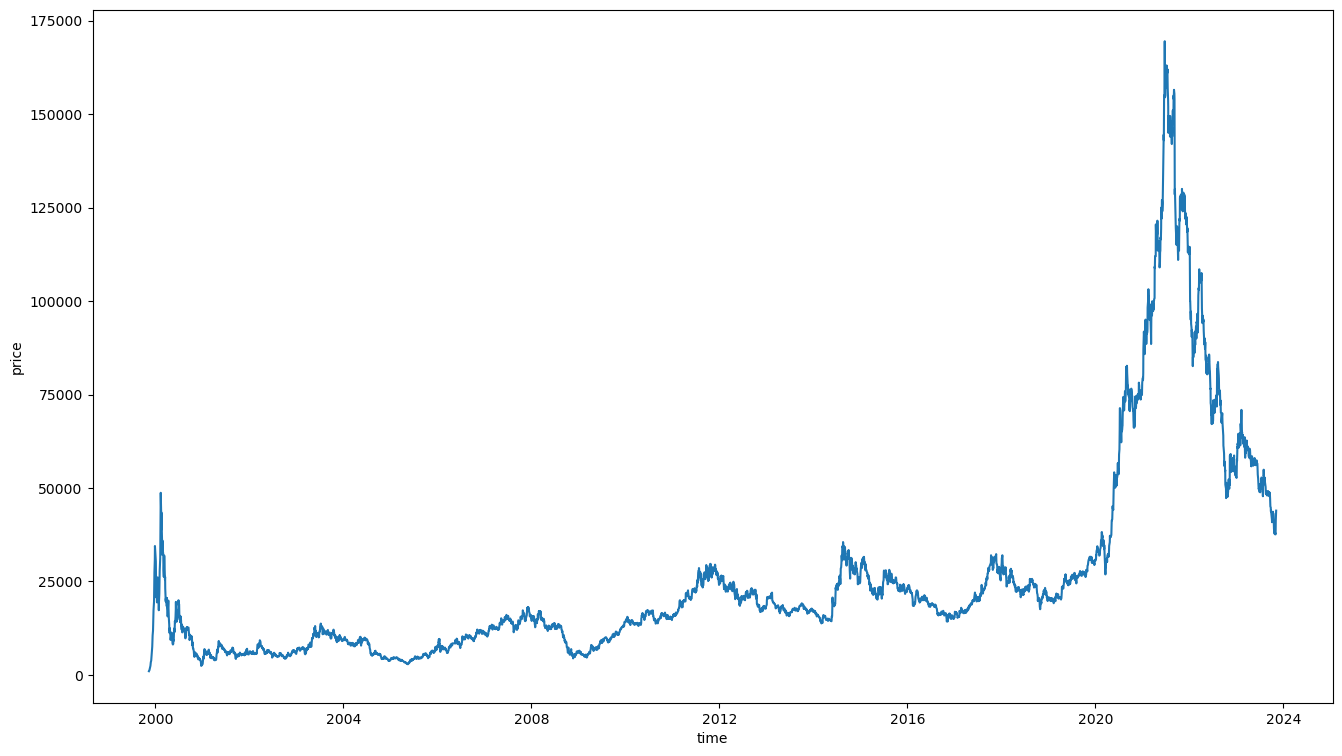

In [21]:
plt.figure(figsize=(16,9))
sns.lineplot(x=kakao.index, y=kakao['Close'])
plt.xlabel('time')
plt.ylabel('price')

In [26]:
ts = [['2000', '2010'],
      ['2010', '2015'],
      ['2015', '2020'],
      ['2020', '2023']]

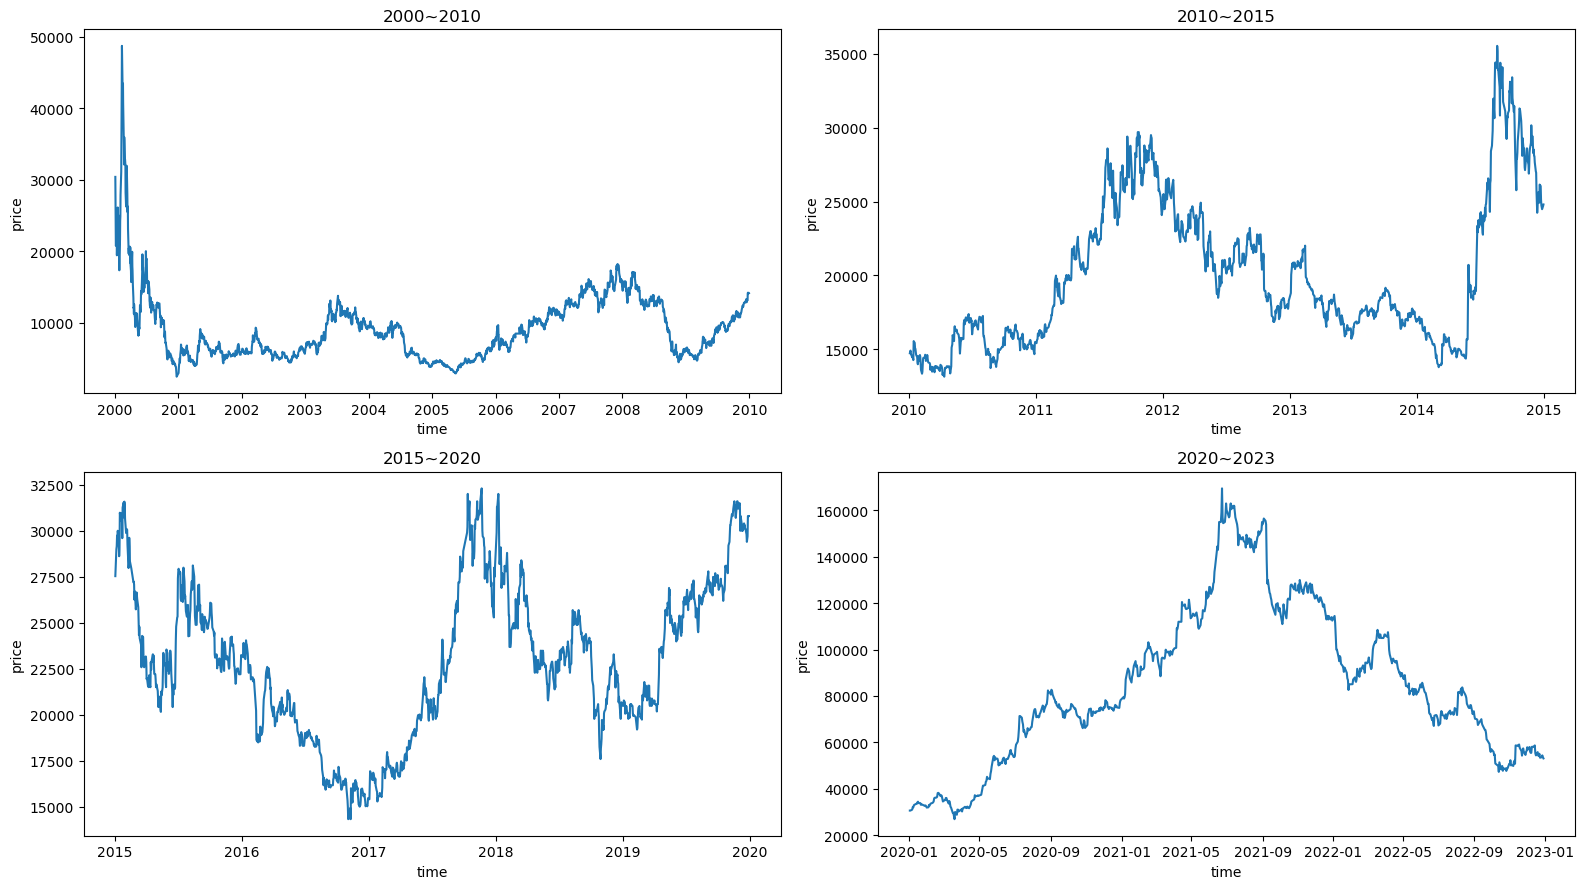

In [28]:
fig,axes=plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout() #그래프간의 간격을 조금 늘려줌(가독성좋아짐)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [32]:
scaled=scaler.fit_transform(kakao[cols])
scaled

array([[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 0.00000000e+00,
        6.35083673e-07],
       [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 6.88423214e-04,
        7.40930952e-06],
       [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 1.48367072e-03,
        2.14340740e-05],
       ...,
       [2.20930233e-01, 2.23121387e-01, 2.35403727e-01, 2.22853277e-01,
        8.09546451e-02],
       [2.28197674e-01, 2.40173410e-01, 2.41614907e-01, 2.39173655e-01,
        1.94519990e-01],
       [2.50000000e-01, 2.55491329e-01, 2.62732919e-01, 2.54900564e-01,
        2.01808528e-01]])

In [33]:
df = pd.DataFrame(scaled, columns=cols)

In [34]:
df

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5915,0.222384,0.225145,0.232609,0.218402,9.482466e-02
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01


In [35]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )

C:\Users\user\AppData\Local\Temp\ipykernel_3896\3045550222.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )


In [39]:
xtrain.shape

(4736, 4)

In [40]:
xtest.shape

(1184, 4)

In [41]:
ytrain.shape

(4736,)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10))) #출력이 3차원 ,timestep2, input dimension 10
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
inputs

array([[0.00221137, 0.13445106, 0.8711516 , 0.71660869],
       [0.77768335, 0.19408149, 0.56290609, 0.71652561],
       [0.99713511, 0.59416946, 0.96029534, 0.33414945],
       [0.24289405, 0.53646633, 0.62819042, 0.37677782],
       [0.94811196, 0.88320402, 0.38981413, 0.36449482],
       [0.5719698 , 0.93273121, 0.68511372, 0.13322318],
       [0.37102638, 0.45956118, 0.18372078, 0.99196485],
       [0.35759046, 0.01088265, 0.30432985, 0.9978846 ],
       [0.85718737, 0.57097249, 0.90506586, 0.82781528],
       [0.77267711, 0.99163624, 0.88864592, 0.77230223]])

In [47]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [ ]:
# github.com/hunkim